## Walkthrough notebook for the Simple Solver
Preform rotation and offset corrections on the reference traces to match an input dataset.

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import sys
ss_path = '/Users/michaelradica/Documents/GitHub/jwst-mtl/'
sys.path.insert(0, ss_path)
from SOSS.extract.simple_solver import simple_solver as ss
from SOSS.trace import get_uncontam_centroids as ctd

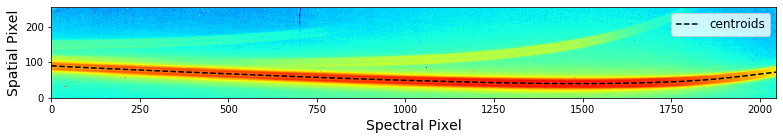

In [2]:
# Open the CV3 SUBSTRIP256 CLEAR exposure.
clear = fits.open('/Users/michaelradica/Documents/School/Ph.D./Research/SOSS/Extraction/Input_Files/cv3_clear.fits')[0].data[::-1]

# Fix NaN edge columns
for i in range(4):
    clear[:,i] = clear[:,4]
    clear[:,2044+i] = clear[:,2043]

# Fill in bad pixels
clear[np.where(clear<0)] = np.nanpercentile(np.abs(clear), 5)
inds = np.where(np.isnan(clear))
clear[inds] = np.tile(np.nanmean(clear, axis=1),(2048,1)).T[inds]

# Show the resulting frame
plt.figure(figsize=(13, 5))
plt.imshow(np.log10(clear), origin='lower', cmap='jet')

# Verify the centroiding algorithm
x, y = ctd.get_uncontam_centroids(clear)
plt.plot(x, y, c='black', ls='--', label='centroids')

plt.xlabel('Spectral Pixel', fontsize=14)
plt.ylabel('Spatial Pixel', fontsize=14)
plt.legend(fontsize=12)

### SUBSTRIP256

Data dimensions:

dimx=2048, dimy=256, xos=1, yos=1, xnative=2048, ynative=256


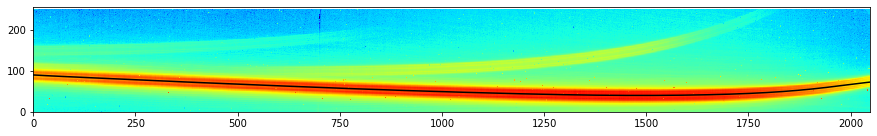

100%|██████████| 5000/5000 [01:56<00:00, 42.76it/s]


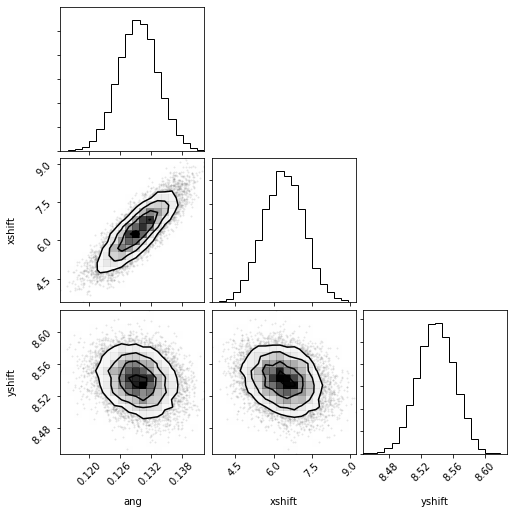

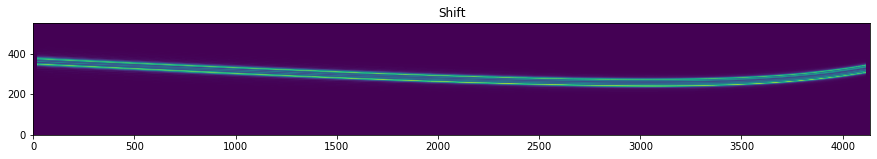

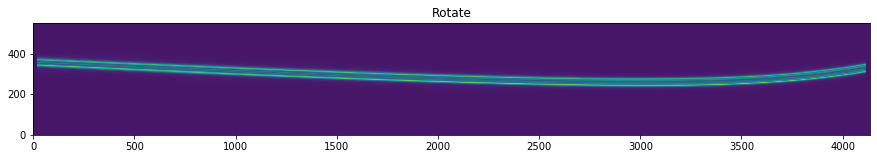

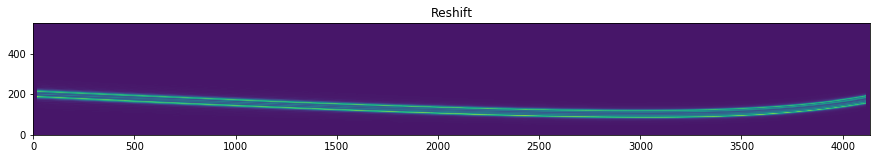

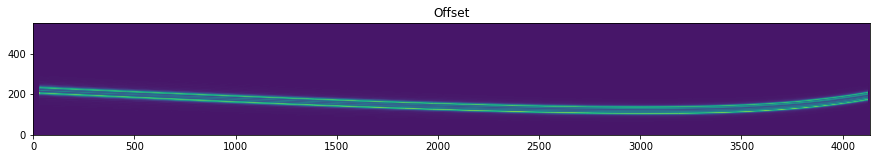

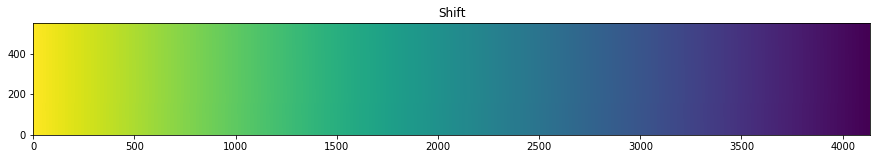

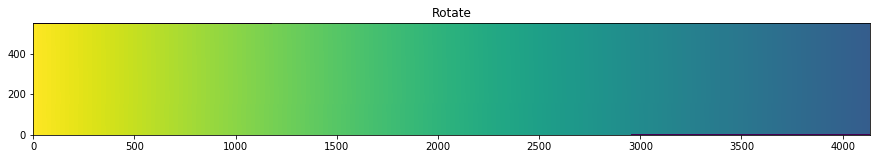

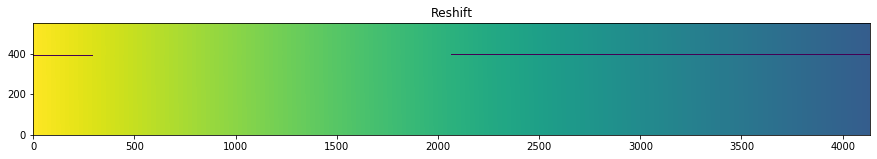

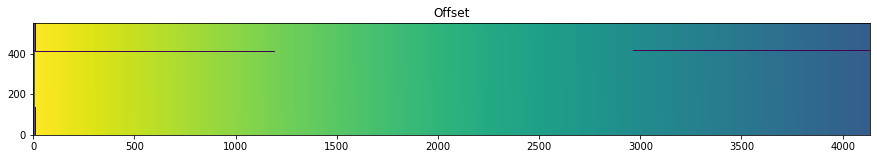

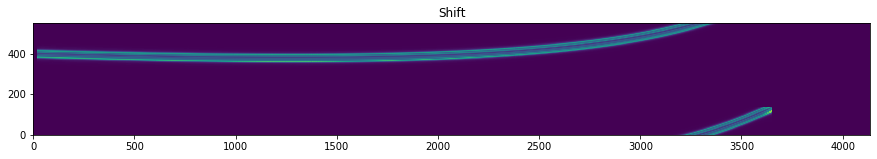

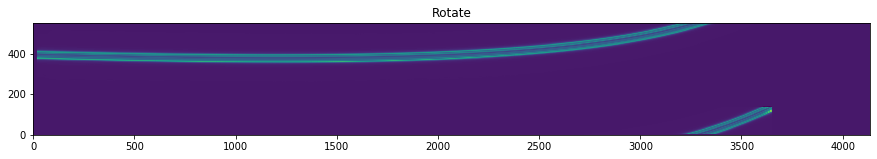

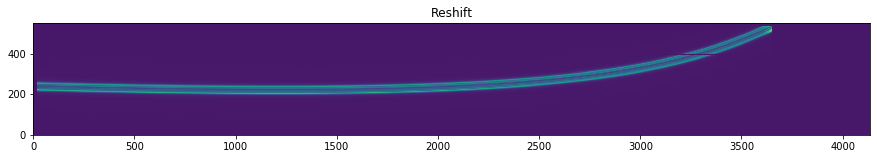

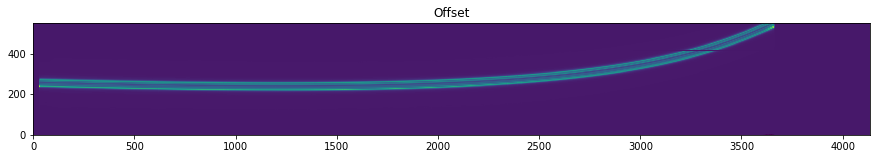

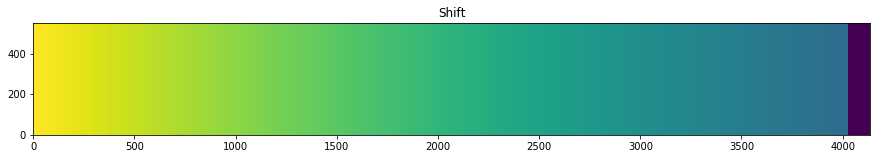

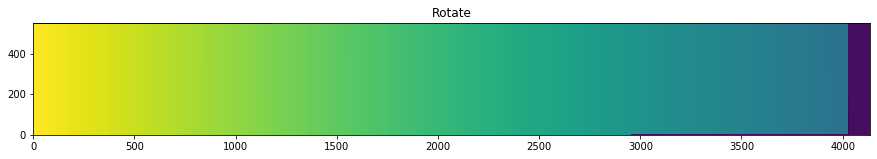

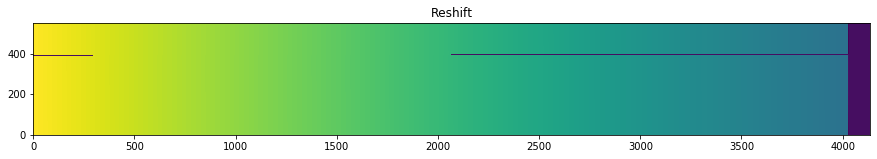

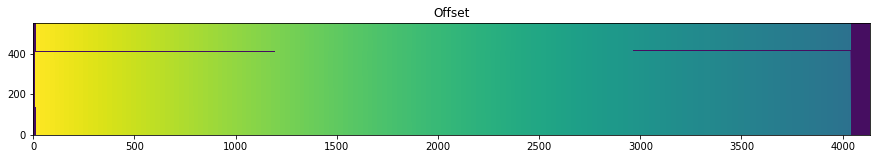

In [3]:
# Run the simple solver on the CV3 data
# Toggle save_to_file=True to write the transformed reference files to disk. 
trace, wave = ss.simple_solver(clear, verbose=True, save_to_file=False)

The simple solver returns two 3D numpy arrays. The first dimension is the spectral order, the second dimension the spatial axis, and the third the spectral axis. If written to disk, each is saved to a seperate multi-extension fits file.


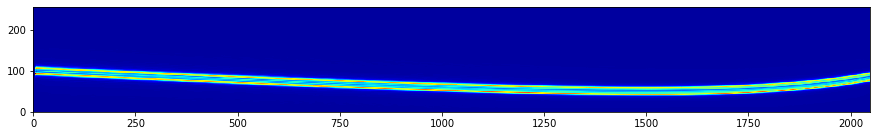

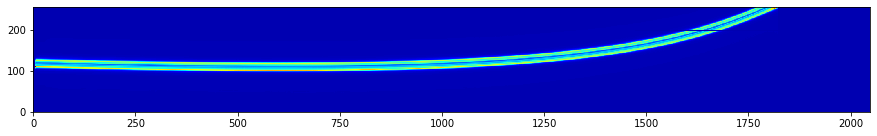

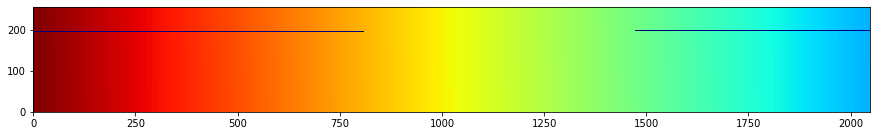

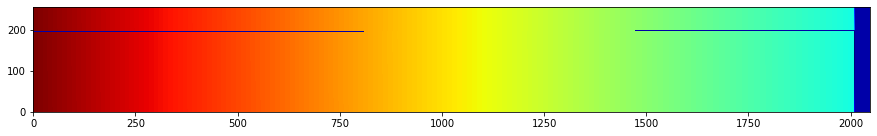

In [4]:
# Plot the transformed reference files
plt.figure(figsize=(15,3))
plt.imshow(trace[0,:,:], origin='lower', cmap='jet')

plt.figure(figsize=(15,3))
plt.imshow(trace[1,:,:], origin='lower', cmap='jet')

plt.figure(figsize=(15,3))
plt.imshow(wave[0,:,:], origin='lower', cmap='jet')

plt.figure(figsize=(15,3))
plt.imshow(wave[1,:,:], origin='lower', cmap='jet')

The dark lines in the last three frames are due to insufficient padding in the reference files, not a problem with the algorithm.

### SUBSTRIP96

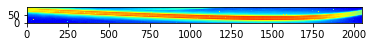

In [5]:
# Cut CV3 into SUBSTRIP96
clear96 = clear[10:-150, :]*1
plt.imshow(np.log10(clear96), origin='lower', cmap='jet')

Data dimensions:

dimx=2048, dimy=96, xos=1, yos=1, xnative=2048, ynative=96


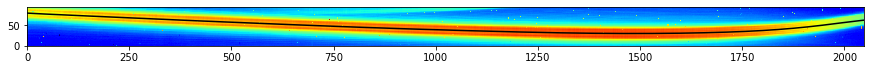

100%|██████████| 5000/5000 [01:57<00:00, 42.71it/s]


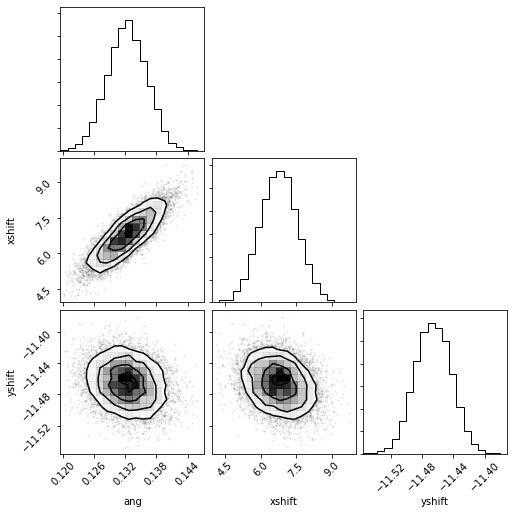

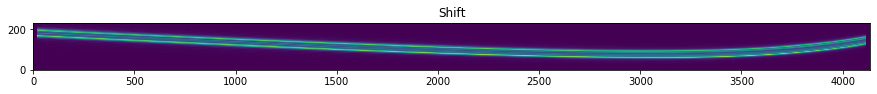

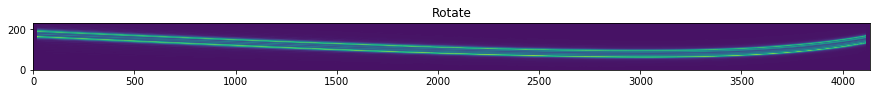

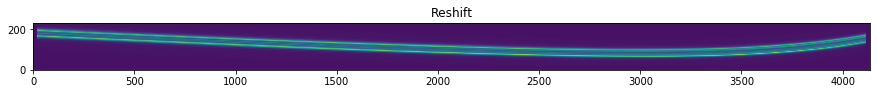

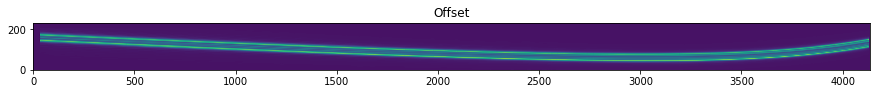

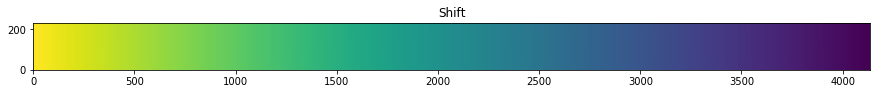

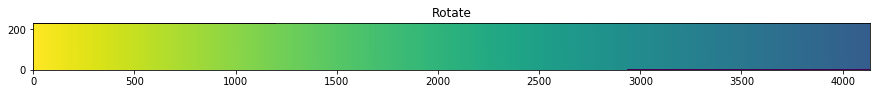

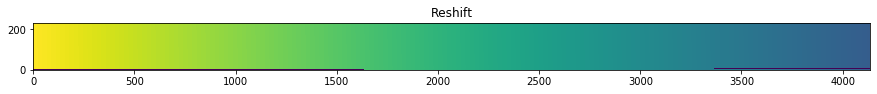

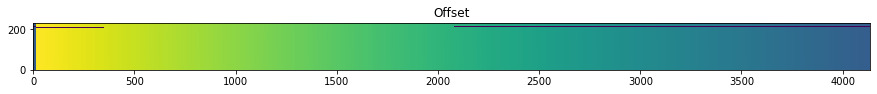

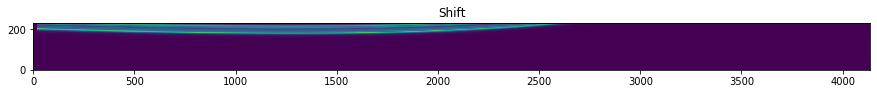

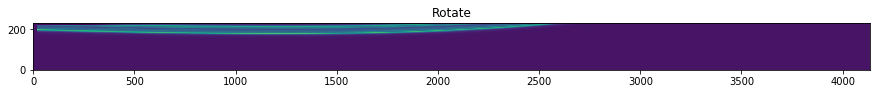

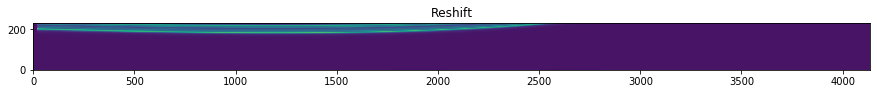

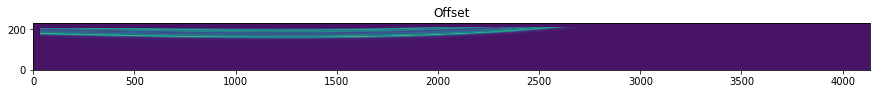

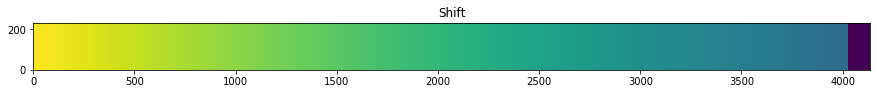

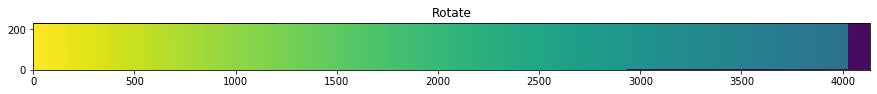

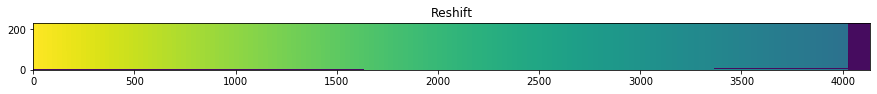

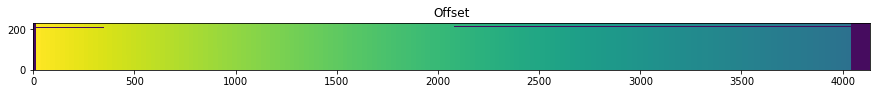

In [6]:
trace, wave = ss.simple_solver(clear96, verbose=True, save_to_file=False)

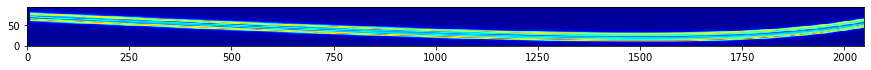

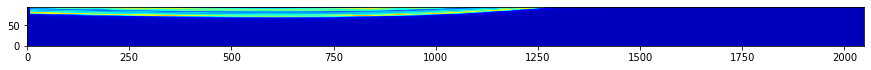

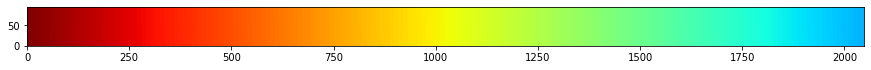

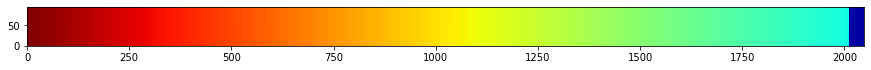

In [7]:
plt.figure(figsize=(15,3))
plt.imshow(trace[0,:,:], origin='lower', cmap='jet')

plt.figure(figsize=(15,3))
plt.imshow(trace[1,:,:], origin='lower', cmap='jet')

plt.figure(figsize=(15,3))
plt.imshow(wave[0,:,:], origin='lower', cmap='jet')

plt.figure(figsize=(15,3))
plt.imshow(wave[1,:,:], origin='lower', cmap='jet')

### FULL

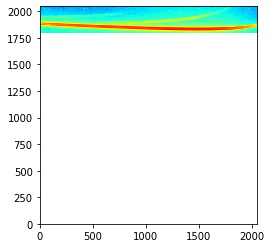

In [8]:
# Extend CV3 to dimensions of FULL
clearFULL = np.zeros((2048, 2048))
clearFULL[-256:, :] = clear
plt.imshow(np.log10(clearFULL), origin='lower', cmap='jet')

Data dimensions:

dimx=2048, dimy=2048, xos=1, yos=1, xnative=2048, ynative=2048


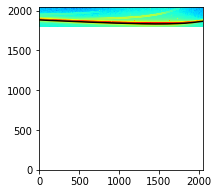

100%|██████████| 5000/5000 [01:54<00:00, 43.83it/s]


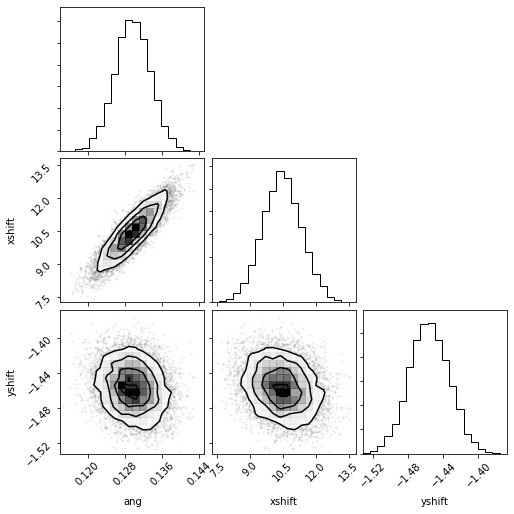

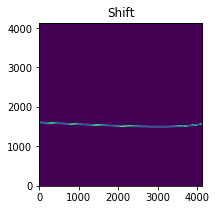

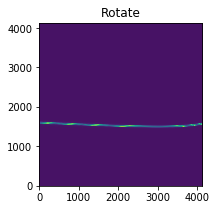

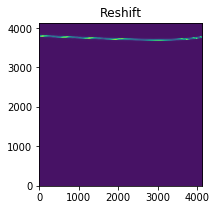

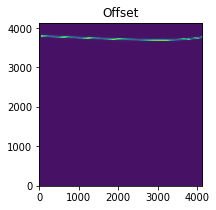

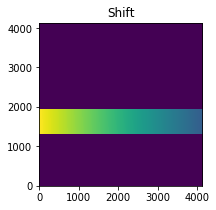

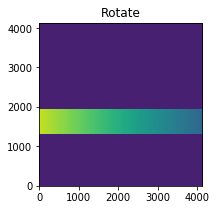

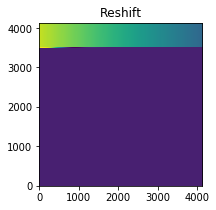

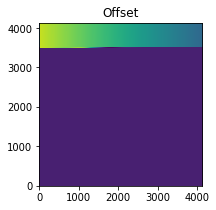

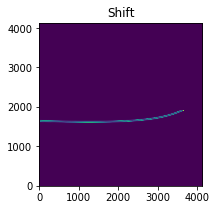

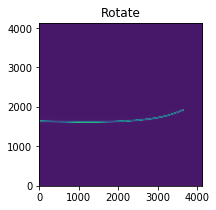

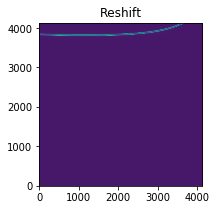

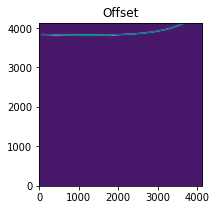

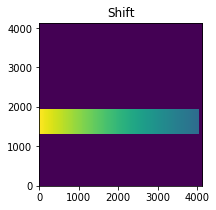

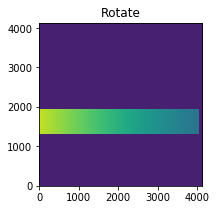

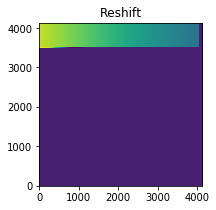

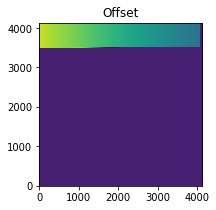

In [9]:
trace, wave = ss.simple_solver(clearFULL, verbose=True, save_to_file=False)

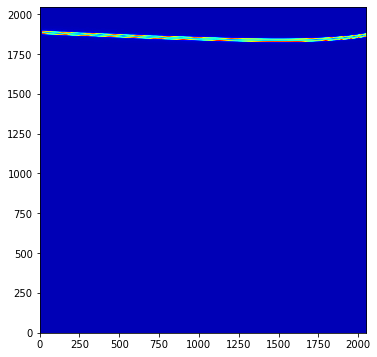

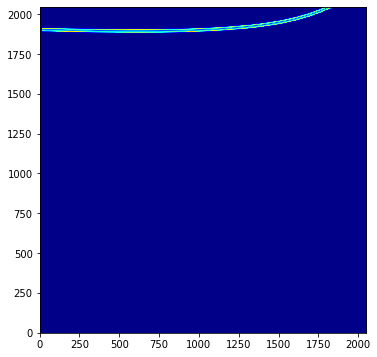

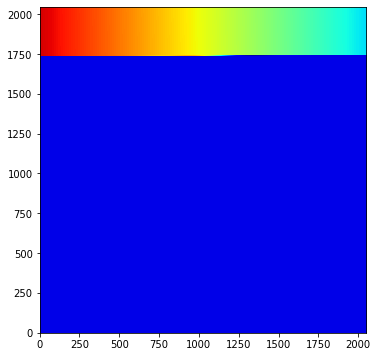

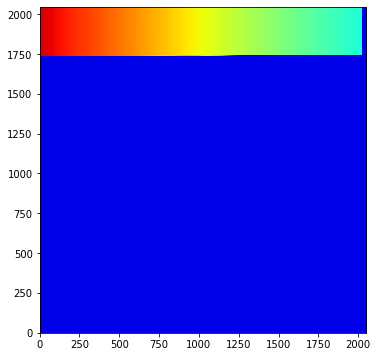

In [10]:
plt.figure(figsize=(6,6))
plt.imshow(trace[0,:,:], origin='lower', cmap='jet')

plt.figure(figsize=(6,6))
plt.imshow(trace[1,:,:], origin='lower', cmap='jet')

plt.figure(figsize=(6,6))
plt.imshow(wave[0,:,:], origin='lower', cmap='jet')

plt.figure(figsize=(6,6))
plt.imshow(wave[1,:,:], origin='lower', cmap='jet')